# Team Members

1. Deepan Chakravarthi Padmanabhan
2. Mihir Mulye

# Assignment 1

- Set Jupyter server in your home account so that you can use it remotely (Optional due to Covid-19!)
- Build 2 layer network for Logistic Regression Classifier using pure python/numpy 
    - Input data x : 20 x 784 (20 is the batch size)
    - label y : 20 x 10
    - Weight Variable W with random_normal initialization
    - Bias variable b with zeros
    - Use softmax activation => softmax(x.W+b)
    - Use OneHot encoding and MSE loss! Not the best way for classification but just for practice 
    - Train the model on MNIST
    - PS: If you dont know how to start see this: http://iamtrask.github.io/2015/07/12/basic-python-network/
- Submit your ipython notebook file to farazi@ais.uni-bonn.de with subject: Assignment1

In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import typing
from sklearn.model_selection import train_test_split

In [2]:
# Path to the MNIST raw dataset gz files
TRAIN_IMAGES = '/data/notebooks/deepan/learning/datasets/mnist/train-images-idx3-ubyte.gz'
TRAIN_LABELS = '/data/notebooks/deepan/learning/datasets/mnist/train-labels-idx1-ubyte.gz'
TEST_IMAGES = '/data/notebooks/deepan/learning/datasets/mnist/t10k-images-idx3-ubyte.gz'
TEST_LABELS = '/data/notebooks/deepan/learning/datasets/mnist/t10k-labels-idx1-ubyte.gz'

# Flag to visualize the dataset after reading them
VISUALIZE = True

def read_images(zip_file_path: str) -> np.ndarray:
    """
    Parameters:
    -----------
    zip_file_path: string
        Path of the images gz file downloaded from http://yann.lecun.com/exdb/mnist/
        
    Return:
    -------
    images: np.ndarray
        Images as numpy array
        
    """
    
    f = gzip.open(zip_file_path, 'r')
    # first 4 bytes is the column count
    magic_number = int.from_bytes(f.read(4), 'big')
    # second 4 bytes is the column count
    image_count = int.from_bytes(f.read(4), 'big')
    # third 4 bytes is the column count
    row_count = int.from_bytes(f.read(4), 'big')
    # fourth 4 bytes is the column count
    column_count = int.from_bytes(f.read(4), 'big')
    # rest is the image pixel data, each pixel is stored as an unsigned byte
    # pixel values are 0 to 255
    image_data = f.read()
    images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))

    return images

def read_labels(zip_file_path):
    """
    Parameters:
    -----------
    zip_file_path: string
        Path of the labels gz file downloaded from http://yann.lecun.com/exdb/mnist/
        
    Return:
    -------
    labels: np.ndarray
        Labels as numpy array
        
    """
    
    f = gzip.open(zip_file_path, 'r')
    # first 4 bytes is a magic number
    magic_number = int.from_bytes(f.read(4), 'big')
    # second 4 bytes is the number of labels
    label_count = int.from_bytes(f.read(4), 'big')
    # rest is the label data, each label is stored as unsigned byte
    # label values are 0 to 9
    label_data = f.read()
    labels = np.frombuffer(label_data, dtype=np.uint8)
    
    return labels


def encode_labels(labels: np.ndarray) -> np.ndarray:
    """
    Function to encode labels using one-hot encoding

    Parameters:
    -----------
    labels: np.ndarray
        Orignal labels as 1D array
        
    Return:
    -------
    encoded_labels: np.ndarray
        One-hot encoded labels array      
    
    """
    
    encoded_labels = []
    for j in range(labels.shape[0]):
        encoded = [1 if n == labels[j] else 0 for n,i in enumerate(range(10))]
        encoded_labels.append(encoded)
    encoded_labels = np.array(encoded_labels)
    
    return encoded_labels

def preprocess_images(images: np.ndarray) -> np.ndarray:
    """
    Function to preprocess images by reshaping and normalizing with the maximum value
    
    Parameters:
    -----------
    images: np.ndarray
        Orignal images read from gz file downloaded from http://yann.lecun.com/exdb/mnist/
        
    Return:
    -------
    images: np.ndarray
        Preprocessed images  
    
    """
    
    images = images.reshape((images.shape[0], images.shape[1] * images.shape[2]))/255
    
    return images

def visualize(train_idx: int, test_idx: int):
    """
    Function to visualize the images and labels given an sample number as index in train and test set
    
    Parameters:
    -----------
    train_idx: integer
    test_idx: integer
        
    """
    
    image_1 = np.asarray(train_images[train_idx, :]).reshape((28, 28))
    label_1 = np.argmax(train_labels[train_idx, :])
    image_2 = np.asarray(test_images[test_idx, :]).reshape((28, 28))
    label_2 = np.argmax(test_labels[test_idx, :])
    plt.subplot(121)
    plt.imshow(image_1)
    plt.title("Train image: label " + str(label_1))
    plt.subplot(122)
    plt.imshow(image_2)
    plt.title("Test image: label " + str(label_2))
    plt.show()

Original size: 
Size of train images (60000, 28, 28) and test images (10000, 28, 28)
Size of train labels (60000,) and test labels (10000,)
Preprocessed size: 
Size of train images (60000, 784) and test images (10000, 784)
Size of train labels (60000, 10) and test labels (10000, 10)


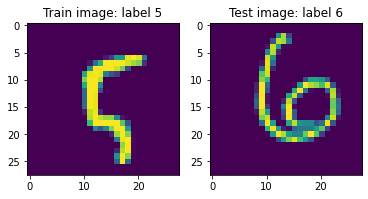

In [3]:
# Read train images and labels
train_images_orig = read_images(TRAIN_IMAGES)
train_labels_orig = read_labels(TRAIN_LABELS)

# Read test images and labels
test_images_orig = read_images(TEST_IMAGES)
test_labels_orig = read_labels(TEST_LABELS)

print("Original size: ")
print("Size of train images {} and test images {}".format(train_images_orig.shape, test_images_orig.shape))
print("Size of train labels {} and test labels {}".format(train_labels_orig.shape, test_labels_orig.shape))

# Preprocess train images and test images
train_images = preprocess_images(train_images_orig)
test_images = preprocess_images(test_images_orig)
print("Preprocessed size: ")
print("Size of train images {} and test images {}".format(train_images.shape, test_images.shape))

# Preprocess data
train_labels = encode_labels(train_labels_orig)
test_labels = encode_labels(test_labels_orig)
print("Size of train labels {} and test labels {}".format(train_labels.shape, test_labels.shape))

if VISUALIZE:
    visualize(train_idx=100, test_idx=100)


In [4]:
def initialize_parameters(n_x: int,
                          n_h: int,
                          n_y: int,
                         ) -> typing.Dict:
    
    """
    Function to initialize the parameters: Weights and bias matrices
    
    Parameters:
    -----------
    n_x: integer
        Number of features in the input    
    n_h: integer
        Number of hidden neurons in the hidden layer
    n_y: integer
        Number of output neurons == number of class labels (in MNIST it is 10)
        
    Return:
    -------
    parameters: Dictionary
        Contains all the parameter of the 2-layer NN.
        The parameters are:
        W1: Weights mapping from input to hidden layer 
        W2: Weights mapping from hidden to output layer
        b1: Bias values added to hidden layer
        b2: Bias values added to output layer
    """
    
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    # Gather all parameters of the 2-layer NN
    parameters = {"W1": W1.T,
                  "b1": b1.T,
                  "W2": W2.T,
                  "b2": b2.T
                 }
    return parameters

In [5]:
def softmax_activation(local_field: np.ndarray) -> np.ndarray:
    """
    Parameters:
    -----------
    local_field: np.ndarray
        Value from XW + b   
        
    Return:
    -------
    activation(local_field): np.ndarray
        softmax(XW + b)
    
    """
    assert len(local_field.shape) == 2
    s = np.max(local_field, axis=1)
    s = s[:, np.newaxis]
    e_x = np.exp(local_field - s)
    div = np.sum(e_x, axis=1)
    div = div[:, np.newaxis]
    return e_x / div

def sigmoid_activation(local_field: np.ndarray) -> np.ndarray:
    """
    Parameters:
    -----------
    local_field: np.ndarray
        Value from XW + b   
        
    Return:
    -------
    s: np.ndarray
        sigmoid(XW + b)
    
    """
    
    s = 1 / (1 + np.exp(-local_field))
    return s

def tanh_activation(local_field: np.ndarray) -> np.ndarray:
    """
    Parameters:
    -----------
    local_field: np.ndarray
        Value from XW + b   
        
    Return:
    -------
    activation(local_field): np.ndarray
        tanh(XW + b)
    
    """
    
    t = np.tanh(local_field)
    return t

In [6]:
def forward_propagation(X: np.ndarray,
                        parameters: typing.Dict,
                       ) -> typing.Tuple:
    """
    Parameters:
    -----------
    X: np.ndarray
        Batch of input images  
        
    parameters: Dictionary
        Contains all the parameters of the 2 layer NN.
        The parameters are:
        W1: Weights mapping from input to hidden layer 
        W2: Weights mapping from hidden to output layer
        b1: Bias values added to hidden layer
        b2: Bias values added to output layer
        
    Return:
    -------
    Variable: Tuple
        Tuple containing the variables A2 and cache.
        A2: np.ndarray
            Final output from the 2-layer NN
        cache: Dictionary
            Z1: Local field from first hidden layer
            A1: Activation(Z1)
            Z2: Local field from the final hidden layer
            A2: Activation(Z2)
    
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Activation(X.W1 + b1)
    # Using tanh activation in the hidden layer
    Z1 = np.dot(X, W1) + b1
    A1 = tanh_activation(Z1)
    
    # Activation(A1.W2 + b2)
    # Using softmax activation in the final layer to provide a probability distribution
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax_activation(Z2)
    
    # Gather all intermediate variables. This will help in backpropagation
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2
            }
    
    return A2, cache

In [7]:
def compute_cost(A2: np.ndarray,
                 Y: np.ndarray,
                 parameters: typing.Dict,
                ) -> float:
    """
    Parameters:
    -----------
    A2: np.ndarray
        Final output from the 2-layer NN
        
    Y: np.ndarray
        True labels in the train set batch
        
    parameters: Dictionary
        Contains all the parameters of the 2 layer NN.
        The parameters are:
        W1: Weights mapping from input to hidden layer 
        W2: Weights mapping from hidden to output layer
        b1: Bias values added to hidden layer
        b2: Bias values added to output layer
        
    Return:
    -------
    batch_error: float
        Mean squared error averaged across the batch size
    
    """
    # Length of the batch
    m = Y.shape[0]
    
    # Calculate MSE
    mse = np.square(A2 - Y).mean(axis=1)
    # Get the mean for the particular batch
    batch_error = mse.sum() / m

    return batch_error

In [8]:
def backward_propagation(parameters: typing.Dict,
                         cache: typing.Dict,
                         X: np.ndarray,
                         Y: np.ndarray,
                        ) -> typing.Dict:
    """
    Parameters:
    -----------
    parameters: Dictionary
        Contains all the parameters of the 2 layer NN.
        The parameters are:
        W1: Weights mapping from input to hidden layer 
        W2: Weights mapping from hidden to output layer
        b1: Bias values added to hidden layer
        b2: Bias values added to output layer
        
    cache: Dictionary
        Z1: Local field from first hidden layer
        A1: Activation(Z1)
        Z2: Local field from the final hidden layer
        A2: Activation(Z2)
        
    X: np.ndarray
        Images in the train set batch
        
    Y: np.ndarray
        True labels in the train set batch
        
        
    Return:
    -------
    grads: Dictionary
        Contains the gradients for all the parameters of the 2 layer NN.
        The parameters are:
        dW1: Gradients of the weights mapping from input to hidden layer 
        dW2: Gradients of the weights mapping from hidden to output layer
        db1: Gradients of the bias values added to hidden layer
        db2: Gradients of the bias values added to output layer
    

    """
    
    m = X.shape[0]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Backpropagation formula for a 2-layer NN
    # Vectorization adapted from Andrew NG: Back propagation intuition youtube video
    dZ2 = (Y - A2)  * -2 * softmax_activation(A2) * (1- softmax_activation(A2))
    dW2 = 1/m * np.dot(A1.T, dZ2)
    db2 = 1/m * np.sum(dZ2, axis=0, keepdims=True)
    dZ1 = np.dot(dZ2, W2.T) * (1 - np.power(A1, 2))
    dW1 = 1/m * np.dot(X.T, dZ1)
    db1 = 1/m * np.sum(dZ1,axis = 0,keepdims = True )
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2
            }
    
    return grads
    
    

In [9]:
def update_parameters(parameters: typing.Dict,
                      grads: typing.Dict,
                      lr: float=0.4,
                     ) -> typing.Dict:
    """
    Parameters:
    -----------
    parameters: Dictionary
        Contains all the parameters of the 2 layer NN.
        The parameters are:
        W1: Weights mapping from input to hidden layer 
        W2: Weights mapping from hidden to output layer
        b1: Bias values added to hidden layer
        b2: Bias values added to output layer
        
    grads: Dictionary
        Contains the gradients for all the parameters of the 2 layer NN.
        The parameters are:
        dW1: Gradients of the weights mapping from input to hidden layer 
        dW2: Gradients of the weights mapping from hidden to output layer
        db1: Gradients of the bias values added to hidden layer
        db2: Gradients of the bias values added to output layer
        
    lr: float
        Learning rate for weight update equation
        
        
    Return:
    -------
    parameters: Dictionary
        Contains all the parameters of the 2 layer NN.
        The parameters are:
        W1: Weights mapping from input to hidden layer 
        W2: Weights mapping from hidden to output layer
        b1: Bias values added to hidden layer
        b2: Bias values added to output layer
    
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # New_weight = Old_weight - learning_rate * Gradient
    W1 = W1 - lr * dW1
    b1 = b1 - lr * db1
    W2 = W2 - lr * dW2
    b2 = b2 - lr * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters


In [10]:
def data_batcher_train(iterable: typing.List,
                 batch_size: int=1
                ) -> typing.Generator[typing.List, None, None]:
    """
    Generator function to batch data according to the batch size provided for TRAIN SET
    
    Parameters:
    -----------
    iterable: List
        List to the size of train set length (for MNIST it is 6000)   
    batch_size: integer
        Batch size for batching the list for each call
        
    Return:
    -------
    iterable: 
        A chunk of the iterable passed. Size of the chunk is equal to the batch_size
    
    """
    l = len(iterable)
    for ndx in range(0, l, batch_size):
        yield iterable[ndx:min(ndx + batch_size, l)]
        
def data_batcher_validation(iterable: typing.List,
                 batch_size: int=1
                ) -> typing.Generator[typing.List, None, None]:
    """
    Generator function to batch data according to the batch size provided for VALIDATION SET
    
    Parameters:
    -----------
    iterable: List
        List to the size of validation set length (for MNIST it is 6000)   
    batch_size: integer
        Batch size for batching the list for each call
        
    Return:
    -------
    iterable: 
        A chunk of the iterable passed. Size of the chunk is equal to the batch_size
    
    """
    l = len(iterable)
    for ndx in range(0, l, batch_size):
        yield iterable[ndx:min(ndx + batch_size, l)]
        
def sampler(iterable_length: int) -> typing.List:
    """
    Function to indirectly shuffle the dataset for training.
    The method generates a list equal to the size of the training dataset and shuffles the list.
    The shuffle list is then batched by the data_batcher method above.
    
    Parameters:
    -----------
    iterable_length: integer
        Length of the list to be generated for mapping train image indices.
        The length is equal to the train images length.
        
    Return:
    -------
    iterable: 
        List of shuffled continuous integer values
    
    """
    iterable = list(range(iterable_length))
    random.shuffle(iterable)
    return iterable

def validation(val_X: np.ndarray,
               val_Y: np.ndarray,
               parameters: typing.Dict,
               batch_size=20,
              ) -> float:
    
    """
    Function performing the 2-layer NN training task
    
    Parameters:
    -----------
    val_X: np.ndarray
        Images in the validation set
    val_Y: np.ndarray
        True labels in the validation set
    parameters: Dictionary
            Contains all the parameters of the 2 layer NN.
            The parameters are:
            W1: Weights mapping from input to hidden layer 
            W2: Weights mapping from hidden to output layer
            b1: Bias values added to hidden layer
            b2: Bias values added to output layer
    batch_size: integer
        Batch size for updating the parameters

    
    Return:
    -------
    running_val_loss: List
        List containing the validation loss each batch across the complete validation set
    """
   
    iterable = sampler(val_X.shape[0])
    batch_size = 20
    running_val_loss = []

    for x in data_batcher_validation(iterable, batch_size): 
        
        # Gather train images and labels as per the indices returned by the batch sampler
        X_ = val_X[x, :]
        Y_ = val_Y[x, :]
        
        # Forward pass the batch images through the 2-layer NN
        A2, cache = forward_propagation(X_, parameters)

        # Compute the cost after forward propagation
        cost = compute_cost(A2,Y_, parameters)
        running_val_loss.append(cost)
    
    return running_val_loss
            
    
    

In [11]:
def nn_model(train_X: np.ndarray,
             train_Y: np.ndarray,
             val_X: np.ndarray,
             val_Y: np.ndarray,
             num_hidden_units: int,
             num_iterations: int,
             batch_size: int=20,
             patience: int=5,
            ) -> typing.Tuple:
    """
    Function performing the 2-layer NN training task
    
    Parameters:
    -----------
    train_X: np.ndarray
        Images in the train set
    train_Y: np.ndarray
        True labels in the train set
    val_X: np.ndarray
        Images in the validation set
    val_Y: np.ndarray
        True labels in the validation set
    num_hidden_units: integer
        Number of hidden neurons in the hidden layer
    num_iterations: integer
        Number of epochs to train the model
    batch_size: integer
        Batch size for updating the parameters
    patience: integer
        Early stopping patience count
    
    Return:
    -------
    
    Variable: Tuple
        Tuple containing parameters, train_cost_per_epoch, val_cost_per_epoch
        parameters: Dictionary
            Contains all the parameters of the 2 layer NN.
            The parameters are:
            W1: Weights mapping from input to hidden layer 
            W2: Weights mapping from hidden to output layer
            b1: Bias values added to hidden layer
            b2: Bias values added to output layer
        train_cost_per_epoch: List
            List containing the training loss for each epoch    
        val_cost_per_epoch: List
            List containing the validation loss for each epoch
    """
    
    np.random.seed(2)
    n_x = train_X[0, :].size
    n_y = train_Y[0, :].size
    n_h = num_hidden_units
    
    print("Number of input units: ", n_x)
    print("Number of hidden units: ", n_h)
    print("Number of output units: ", n_y)

    parameters = initialize_parameters(n_x, n_h, n_y)
    
    iterable = sampler(train_X.shape[0])
    
    train_costs_per_epoch = []
    val_costs_per_epoch = []
    best_validation_loss = np.inf
    patience_count = patience
    
    for i in range(0, num_iterations):
    
        running_train_loss = []
        
        for x in data_batcher_train(iterable, batch_size): 
            
            # Gather train images and labels as per the indices returned by the batch sampler
            X_ = train_X[x, :]
            Y_ = train_Y[x, :]
            
            # Forward pass the batch images through the 2-layer NN
            A2, cache = forward_propagation(X_, parameters)
            
            # Compute the cost after forward propagation
            cost = compute_cost(A2, Y_, parameters)
            running_train_loss.append(cost)
            
            # Compute gradients for weight update
            grads = backward_propagation(parameters, cache, X_, Y_)
            
            # Update the weights
            parameters = update_parameters(parameters, grads)
        
        # Train loss after each epoch
        train_loss = sum(running_train_loss)/len(running_train_loss)
        train_costs_per_epoch.append(train_loss)
        
        # Validation loss after each epoch of training model on the validation set
        running_val_loss = validation(val_X, val_Y, parameters, batch_size)
        val_loss = sum(running_val_loss)/len(running_val_loss)
        val_costs_per_epoch.append(val_loss)
        
        # Early stopping: Waits up to the 'patience' number of epochs for a better model
        # If a better model is not found for the 'patience' number of epochs then training stops
        # To avoid overfitting of the model to the train set
        if val_loss < best_validation_loss:
            best_validation_loss = val_loss
            best_model = parameters
            patience_count = patience
            print("Better model found: Epoch: %i -- Train loss: %f -- Validation loss: %f"%(i + 1, train_loss, val_loss))
        else:
            patience_count = patience_count - 1
            print("No better model found: Epoch: %i -- Train loss: %f -- Validation loss: %f"%(i + 1, train_loss, val_loss))
            
        if patience_count == 0:
            print("Early stopping triggered: Epoch: %i -- Train loss: %f -- Validation loss: %f" %(i + 1, train_loss, val_loss))
            break
            
    return parameters, train_costs_per_epoch, val_costs_per_epoch    

In [12]:
# Split dataset
X_train, X_val, Y_train, Y_val = train_test_split(train_images, train_labels, test_size=0.3, random_state=42)

# Train the model
parameters, train_costs_per_epoch, val_costs_per_epoch = nn_model(X_train,
                                                                  Y_train,
                                                                  X_val,
                                                                  Y_val,
                                                                  num_hidden_units=100,
                                                                  num_iterations=100,
                                                                  batch_size=20,
                                                                  patience=5,
                                                                  )

Number of input units:  784
Number of hidden units:  100
Number of output units:  10
Better model found: Epoch: 1 -- Train loss: 0.018892 -- Validation loss: 0.011348
Better model found: Epoch: 2 -- Train loss: 0.008761 -- Validation loss: 0.008280
Better model found: Epoch: 3 -- Train loss: 0.006412 -- Validation loss: 0.006861
Better model found: Epoch: 4 -- Train loss: 0.005068 -- Validation loss: 0.006082
Better model found: Epoch: 5 -- Train loss: 0.004187 -- Validation loss: 0.005634
Better model found: Epoch: 6 -- Train loss: 0.003567 -- Validation loss: 0.005373
Better model found: Epoch: 7 -- Train loss: 0.003088 -- Validation loss: 0.005207
Better model found: Epoch: 8 -- Train loss: 0.002713 -- Validation loss: 0.005122
Better model found: Epoch: 9 -- Train loss: 0.002432 -- Validation loss: 0.005087
Better model found: Epoch: 10 -- Train loss: 0.002212 -- Validation loss: 0.005079
No better model found: Epoch: 11 -- Train loss: 0.002034 -- Validation loss: 0.005089
No bette

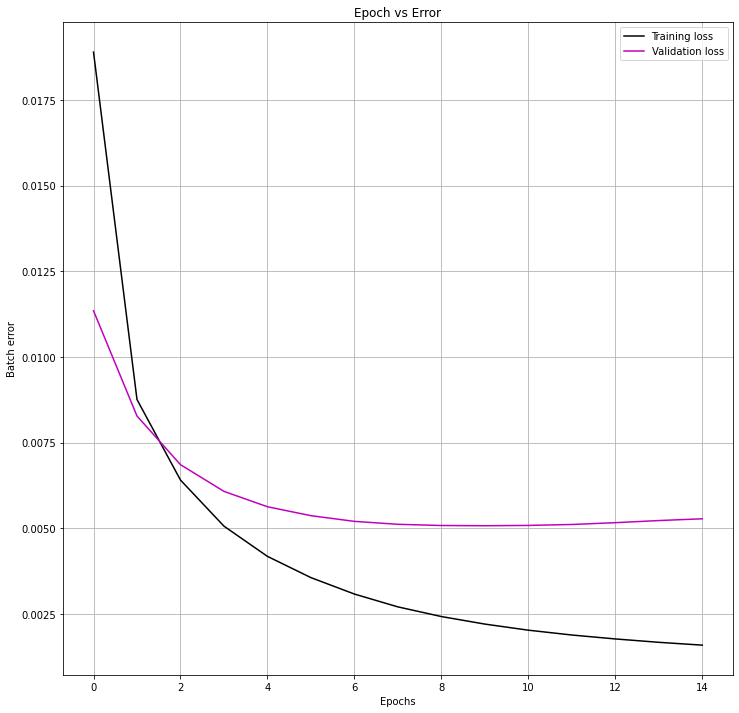

In [13]:
# Visualize the training loss of the model
plt.figure(figsize=(12,12))
plt.plot(train_costs_per_epoch, c='k', label='Training loss')
plt.plot(val_costs_per_epoch, c='m', label='Validation loss')
plt.title('Epoch vs Error')
plt.xlabel('Epochs')
plt.ylabel('Batch error')
plt.legend()
plt.grid()
plt.show()

In [14]:
def predict(X: np.ndarray,
            parameters: typing.Dict,
           ) -> np.ndarray:
    """
    Parameters:
    -----------
    X: np.ndarray
        Images in the test set
    parameters: Dictionary
            Contains all the parameters of the 2 layer NN.
            The parameters are:
            W1: Weights mapping from input to hidden layer 
            W2: Weights mapping from hidden to output layer
            b1: Bias values added to hidden layer
            b2: Bias values added to output layer
        
    Return:
    -------
    predictions: np.ndarray
        Predictions on MNIST test set using the trained 2-layer NN
    
    """
    
    A2, cache = forward_propagation(X, parameters)
    predictions = np.argmax(A2, axis=1)
   
    return predictions

def accuracy_metric(Y: np.ndarray,
                    predictions: np.ndarray,
                   ) -> float:
    """
    Parameters:
    -----------
    Y: np.ndarray
        True labels in the test set
    predictions: np.ndarray
        Predictions on MNIST test set using the trained 2-layer NN
        
    Return:
    -------
    accuracy: float
        Accuracy metric on the Y and predictions provided to the function 
    
    """
    correct = 0
    for i in range(len(Y)):
        if Y[i] == predictions[i]:
            correct += 1
    accuracy = correct / float(len(Y)) * 100.0
    return accuracy

def metrics(Y: np.ndarray,
            predictions: np.ndarray,
           ):
    """
    Calculates the accuracy and prints the confusion matric for the true labels and predictions provided
    Parameters:
    -----------
    Y: np.ndarray
        True labels in the test set
    predictions: np.ndarray
        Predictions on MNIST test set using the trained 2-layer NN   
    
    """
    print("Accuracy: ", accuracy_metric(Y, predictions))
    df_confusion = pd.crosstab(Y, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
    print("Confusion matrix: \n", df_confusion)

predictions = predict(test_images, parameters)
Y_test = np.argmax(test_labels, axis=1)
metrics(Y_test, predictions)


Accuracy:  96.78
Confusion matrix: 
 Predicted    0     1     2     3    4    5    6     7    8    9    All
Actual                                                                
0          964     0     2     2    0    2    6     1    1    2    980
1            0  1118     4     2    1    1    2     1    6    0   1135
2            8     0   994     8    1    0    5     8    7    1   1032
3            1     0     4   982    1    6    0     3    9    4   1010
4            1     0     2     0  949    1    5     5    2   17    982
5            6     1     1    23    0  846    5     1    5    4    892
6            7     1     1     1    8    7  925     0    8    0    958
7            1     2     9    11    0    1    0   995    1    8   1028
8            5     0     1     7    2    4    4     4  945    2    974
9            2     4     0    10   11    4    0     9    9  960   1009
All        995  1126  1018  1046  973  872  952  1027  993  998  10000


### References:

1. Matheus Bento Fernandes, GitHub - Mini Batch Neural Network, URL: https://github.com/matheusbfernandes/mini_batch_neural_net/, Accessed on: 16. 11. 2020. 
2. Fotis Kapotos, GitHub - Deep Learning Coursera, URL: https://github.com/fotisk07/Deep-Learning-Coursera/, Accessed on: 16. 11. 2020.
3. Benroth, Stack Exchange- Derivative of softmax and squared error, URL: https://stats.stackexchange.com/questions/153285/derivative-of-softmax-and-squared-error, Accessed on: 16. 11. 2020.